# Titanic - Machine Learning from Disaster

This project is my attempt at analyzing the Titanic dataset provided by Kaggle.

https://www.kaggle.com/c/titanic-gettingStarted

***

## Part 0: Preliminary

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

%matplotlib inline

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***

## Part 1:  EDA

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are a total of 891 passengers.  Note that there are quite a bit of null entries in the <font color=blue>**Cabin**</font> column.  Also, ages for some passengers are missing.

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Notice that some ages are listed as a decimal indicating years and months.  Some ages are less than 1 indicating they are babies.

***

## Part 2: Questions

###### Question 1.  Who were the passengers on the Titanic (Ages, Gender, Class,..etc)

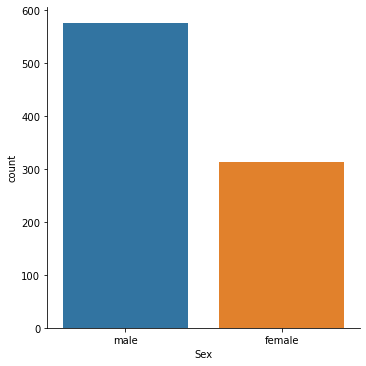

In [7]:
sns.catplot(x='Sex', data=titanic_df, kind='count')

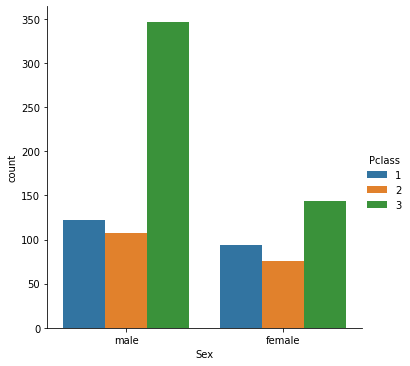

In [8]:
sns.catplot(x='Sex', hue='Pclass', data=titanic_df, kind='count')

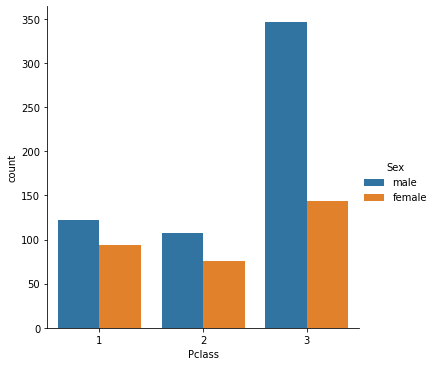

In [9]:
sns.catplot(x='Pclass', hue='Sex', data=titanic_df, kind='count')

Notice that the ratio of male to female is almost 2:1, and majority of the male passengers are in the 3rd class.  In the last graph, it shows that majority of the 3rd class passengers are male, while in the 1st and 2nd class, male and female passengers are roughly equal with male passengers slightly more than female passengers.

Let's now create a function will be applied to each passenger to sort them into <font color = blue>**male**, **female**</font>, and <font color=blue>**child**</font>.  Here we will define a child as a person 15 years old or younger.

In [10]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age <= 15:
        return 'child'
    else:
        return sex

In [11]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

Let's generate the same graphs but now with <font color=blue>**child**</font> as another category of person.

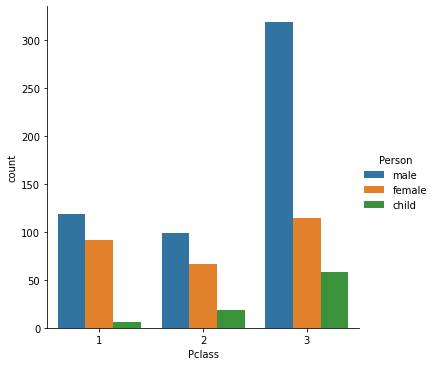

In [12]:
sns.catplot(x='Pclass', hue='Person', data=titanic_df, kind='count')

As shown above, quite a bit of children are in the 3rd class, but not many are in the 1st class.

Let's take a look at the age distribution of the passengers.

<AxesSubplot:>

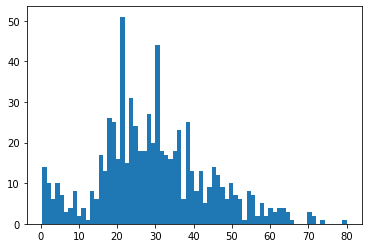

In [13]:
titanic_df.Age.hist(bins=70,grid=False)

The number of children passengers tapers off as the age approaches 13/14 years old.  Then the distribution is somewhat normal with two peaks at around 20 nd 30 years old.

Let's find the mean age of the passengers.

In [14]:
titanic_df.Age.mean()

29.69911764705882

The mean age is around 30 years old.

In [15]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

Of the total 891 passengers, 537 are male, 271 are female, and 83 are children (15 yrs and younger).

Another way to visualize these data is to use KDE (kernal density estimation) plots.

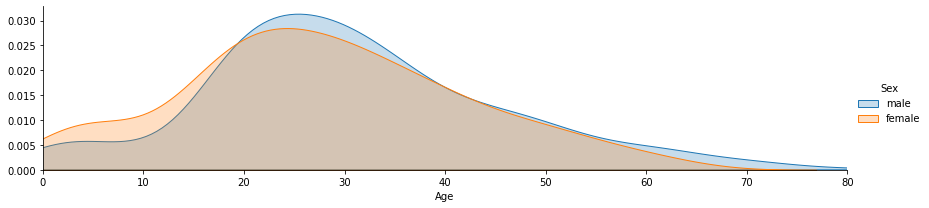

In [16]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df.Age.max()

fig.set(xlim=(0,oldest))

fig.add_legend()

Here we see that the age distributions for male and female is roughly the same.

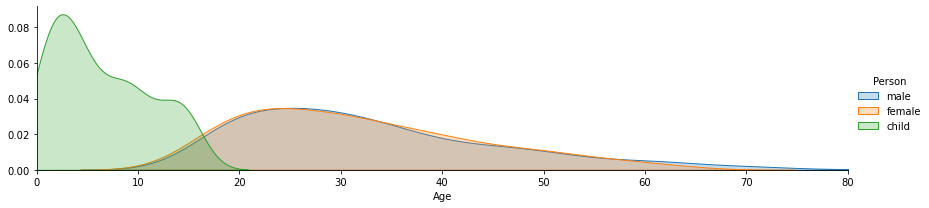

In [17]:
fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df.Age.max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In the plot above, we separate out the age distribution for children from the rest of the population.  Notice how majority of the children are around 2 to 4 years old, which corresponds to the age histogram we plotted earlier.

Two things to take a note here:

1. Even though the peak value for the child distriution is higher than that of the male and female distribution, it does not mean that there are more children than adult male and female passengers.  The area under each shaded distribution equals to 1, which, in the case of child distribution, represents 83 children.  It is within those 83 children most of them are around the age of two to four.

2. We define a child as a person 15 or younger.  But the child distribution clearly tapers off to 20.  This is the result of the KDE plot and the choice of bandwidth for the kernel.  In essence, KDE plot is an estimation of the distribution of a variable.  It resembles the shape of the histogram of that variable.  By adjusting the bandwidth, we can smooth the estimation (or make it more rough and discrete-like).

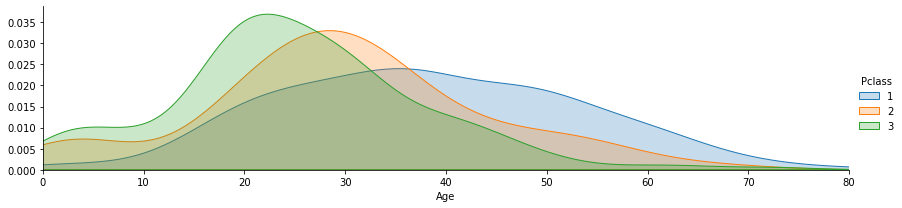

In [18]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df.Age.max()

fig.set(xlim=(0,oldest))

fig.add_legend()

Here is another view of the age distribution based on class.  Notice that in the 3rd class, majority of the passengers are in in their early 20's.  In the 2nd class, majority of the passengers are in their late 20's.  In the 1st class, majority of the passengers are in their mid to late 30's.

##### Question 2.  What deck were the passengers on and how does that relate to their class?

Let's revisit the data again.

In [19]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


We are primarily interested in the <font color=blue> **Cabin** </font> column.  Notice that there are some null values.  In fact, the code `titanic_df.head()` shows us that there are only 204 out of 891 entries that are non-null.

In [20]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Person       891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


For this question, let's focus on the non-null entries.  Note that for the non-null entries, each cabin assignment starts out with a letter.  That's the <font color=blue> **deck** </font> we are interested in.  Let's see a bar chart of the deck assignment.  To do so, we will first pull out the Cabin column from the titanic dataframe and drop all the null entries.  Then we will iterate through each entry to pull the deck letter.

In [21]:
cabin = titanic_df.Cabin.dropna()
cabin.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

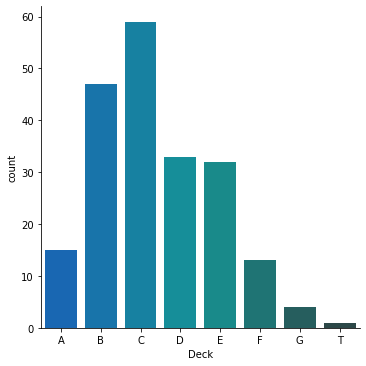

In [22]:
deck = []

for c in cabin:
    deck.append(c[0])
    
deck = pd.DataFrame(deck, columns=['Deck'])

order = deck.Deck.unique()
order = np.sort(order)

sns.catplot(x='Deck', data=deck, kind='count', palette='winter_d', order=order)

There are cabins assigned with the letter **T**, which is really not a deck.  Let's remove that and replot the graph.

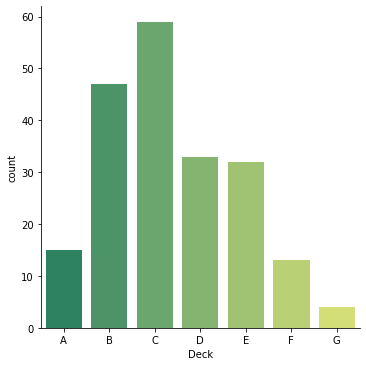

In [23]:
deck = deck[deck.Deck != 'T']

order = deck.Deck.unique()
order = np.sort(order)

sns.catplot(x='Deck', data=deck, kind='count', palette='summer', order=order)

We can see that majority of the passengers with cabins are on **B**, **C**, **D**, and **E** decks.

Let's now merge the deck information to the dataframe and see how the classes of passengers are related to their assigned decks.

In [24]:
deck_df = titanic_df[titanic_df['Cabin'].notnull()]

# Remove that passenger assigned to the 'T' deck.    
index = [i for i in deck_df.index if deck_df['Cabin'][i][0] != 'T']
deck_df = deck_df[deck_df.index.isin(index)]

# Add the 'Deck' column to the dataframe.
deck = []
for i in deck_df.index:
    deck.append(deck_df['Cabin'][i][0])
deck_df['Deck'] = deck

deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,C


We have now successfully add the <font color=blue>**Deck**</font> column to the dataframe (and also remove that passenger that was assigned to the T deck).

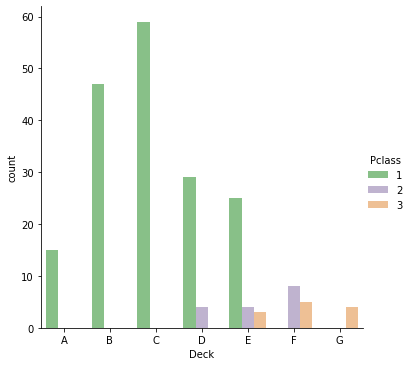

In [36]:
sns.catplot(data=deck_df, kind='count', x='Deck', hue='Pclass', order=order, palette='Accent')

Here we see that decks A, B, and C are exclusively 1st class.  Deck D has both 1st and 2nd classes.  Deck E has all three classes.  Deck F has 2nd and 3rd classes.  Deck G is exclusively 3rd class.

Deck B and C have the most number of cabins, and there is not a lot of 2nd and 3rd class cabins.

##### Question 3.  Where did the passengers come from?`

Let's now turn our attention to passenger's class association with their port of embarkation.

In [26]:
titanic_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

Shown above, there are three ports of embarkation.  Kaggle.com tells us that **C** is for Cherbough, **Q** is for Queenstown, and **S** is for Southhampton.  Let's generate a plot showing class association from each port.

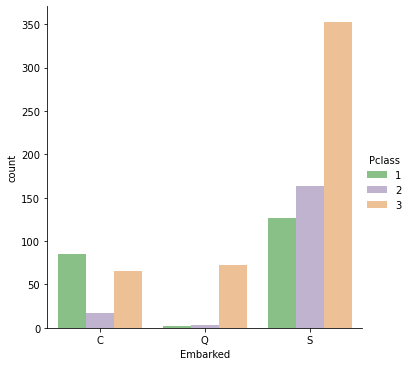

In [27]:
sns.catplot(data=titanic_df, x='Embarked', hue='Pclass', order=['C','Q','S'], palette='Accent', kind='count')

Interesting enough, almost all passengers from Queenstown are in the 3rd class!  Further, notice that about 2/5 of the 1st class passengers are from Cherbough.  This observation tells us a bit about the economic status of the towns themselves.

##### Question 4.  Who was alone and who was with family?

To determine if a person is alone or with family, let's turn our attention to the data columns named <font color=blue>**SibSp**</font> and <font color=blue>**Parch**</font>.  According the Kaggle.com, if <font color=blue>**SibSp**</font> is 0, that means the person does not have a sibling or siblings with the person.  Same with the <font color=blue>**Parch**</font>, it notates if a person is with parents or with children.

We will create another column called <font color=blue>**Alone**</font> to capture the *alone* or *with family* status.

In [32]:
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'
titanic_df.head(10)

/Users/justinhsia/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family


A slice of the dataframe shown above indicates that we have successfully added the column <font color=blue>**Alone**</font> to the dataframe.  We can now use that data to generate some graphs.

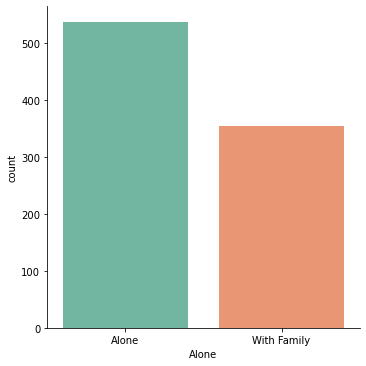

In [43]:
sns.catplot(data=titanic_df, x='Alone', kind='count', palette='Set2', order=['Alone','With Family'])

We see that there are more people alone than with family.

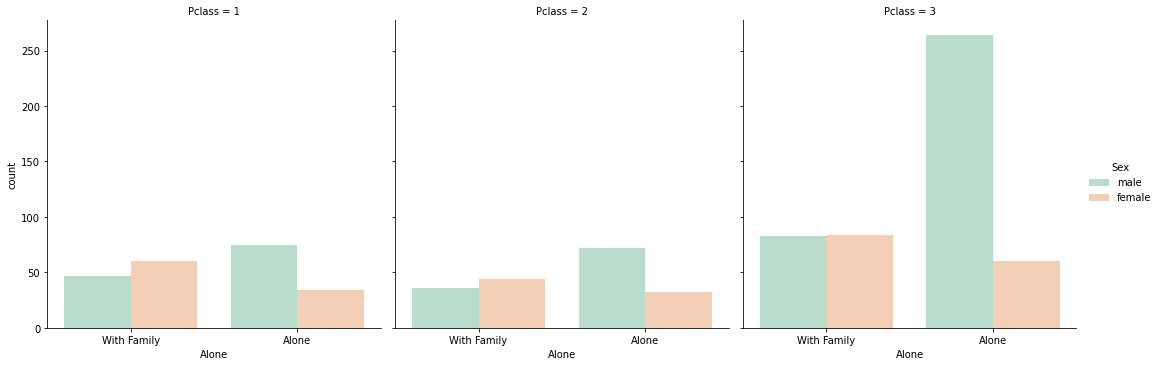

In [69]:
sns.catplot(data=titanic_df, x='Alone', col='Pclass', hue='Sex', kind='count', palette='Pastel2')

We see that in the 3rd class most males are single.  Perhaps these were young people moving to America to start a new life.  Let's verify this view point by focusing on the age distribution of 3rd class single males.

<AxesSubplot:>

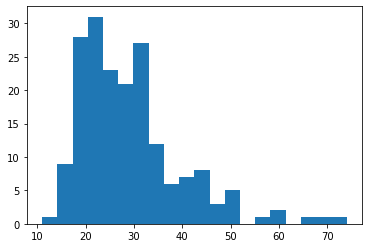

In [93]:
# titanic_df[titanic_df['Pclass'] == '3' & titanic_df['Sex']=='male']['Age'].hist(bins=20)

titanic_df[(titanic_df['Pclass'] == 3) 
           & (titanic_df['Sex']=='male') 
           & (titanic_df['Alone']=='Alone')].Age.hist(bins=20, grid=False)

Not surprising, the histogram is right skewed with the majority of the young men around 20 and 30 years old.  What is interesting is that there are around 10 young men in their teens that are on board the Titanic.  Perhaps children back then gained their independece a lot younger than now.

##### Question 5.  What factors helped someone survive the sinking?

In the original dataset, there is a column named <font color=blue>**Survived**</font>, where 1 means the person survived and 0 means the person did not survive.  We will create another column to turn those 1's and 0's into actual words or **Yes** and **No**.

In [95]:
titanic_df['Survivor'] = titanic_df.Survived.map({1:'Yes', 0:'No'})

Let's take a look at how many people survived and how many perished.

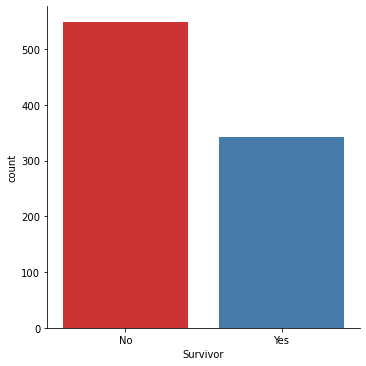

In [100]:
sns.catplot(data=titanic_df, x='Survivor', kind='count', palette='Set1')

More than 500 hundred people died and around 350 survived.

Let's get the actual numbers.

In [120]:
survived = titanic_df.Survived.sum()
died = titanic_df[titanic_df.Survived == 0].Survived.count()
rate = survived/(survived+died)*100

print('There are %d survivors while %d people perished in this disaster.' %(survived, died))
print('The survival rate is %.2f%%.' %rate)

There are 342 survivors while 549 people perished in this disaster.
The survival rate is 38.38%.


Now let's turn our attention to factors that might affect one's survival rate.  In the movie *Titanic*, it was portraited that the 3rd class passengers did not fair well against the 1st and the 2nd class passengers.  Let's see if that is true.

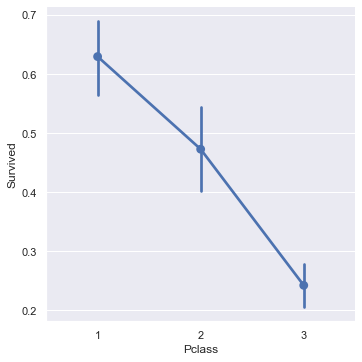

In [138]:
sns.set_theme()
sns.catplot(data=titanic_df, x='Pclass', y='Survived', kind='point')

The graph above estimates the central tendency of survival rate within each class.  The vertical line extending above and below each point indicates the uncertainty in the estimate.  Base on this graph, indeed the 3rd class passengers have the lowest survival rate.  However, prior analysis has shown us that there are a lot more male passengers in the 3rd class than in any other classes, and we also know that it was advocated ***women and children first***.  Therefore, the survival rate in the 3rd class could have been severely skewed.  Perhaps a better comparison is to further refine the graph by separating out women and children.  We created that data column in the prior analysis.  The column name is <font color=blue>**Person**</font>.  We will use that column as the `hue` parameter in our graph.

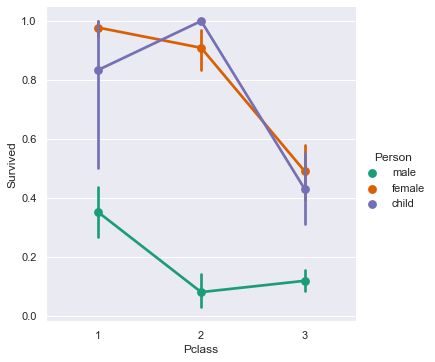

In [145]:
sns.catplot(data=titanic_df, x='Pclass', y='Survived', hue='Person', kind='point', palette='Dark2')

The graph above shows us that regardless of a person's class, being a male dramatically decreases that person's chance of survival.  The best chance of survival, as indicated in the graph, is being a 1st class female or a 2nd class child.  As a matter of fact, almost all of them survived.  And contrary to what the movie portraited, being a 2nd class male has just about the same chance of survival as a 3rd class male, and a 1st class child does not fair well against a 2nd class child.

Let's now see if age has anything to do with the survival rate by using a linear regression graph.

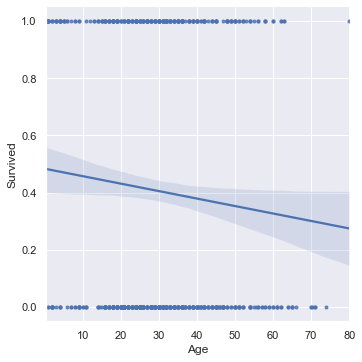

In [150]:
sns.lmplot(data=titanic_df, x='Age',y='Survived', markers='.')

The graph above shows us that older people did not have a better survival rate.  The dots on the top and on the bottom are individual data points indicating if a person survived (dots at the `y=1` line) or perished (dots at the `y=0` line).  The shaded blue area around encompassing the regression line is the confidence interval.

We can clean up the graph a bit by binning each data point into an *age* bin.  We will also add the <font color=blue>**Pclass**</font> parameter to the hue.

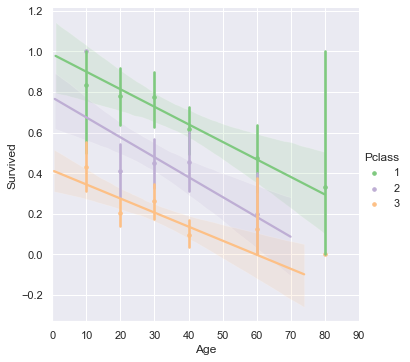

In [155]:
age_bins = [10, 20, 30, 40, 60, 80]

sns.lmplot(data=titanic_df, x='Age',y='Survived', x_bins=age_bins,
           hue='Pclass', markers='.', palette='Accent').set(xlim=(0,90))

The graph shows us that there is indeed a dependency between the survival rate and the age and class of a person.  Older people tend not to survive the sinking.  It is interesting to note that the uncertainty interval for 1st class older people is huge.  This could be due to the small number of data points available for that category.

What about gender and age vs. survival rate?  Let's take a look!

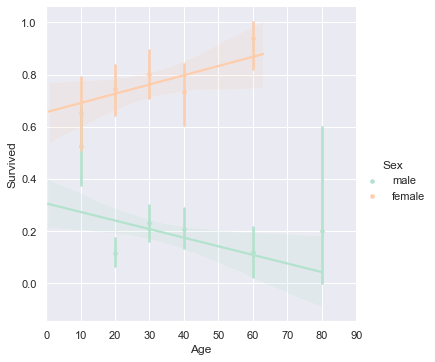

In [156]:
sns.lmplot(data=titanic_df, x='Age',y='Survived', x_bins=age_bins,
           hue='Sex', markers='.', palette='Pastel2').set(xlim=(0,90))

This is interesting!  Older females tend to have better survival rate than older male.  This phenomenon perhaps is indictive of the chivalry/gentlemen characters that the British people champion.

Let's make another graph, but this time we will focus on male/female/child and age vs survival rate.

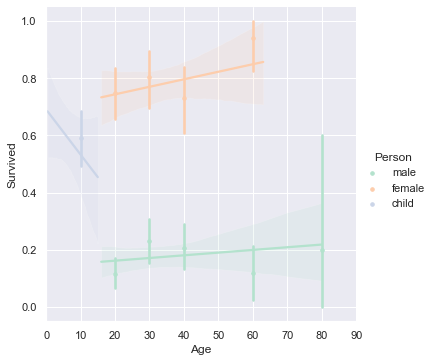

In [158]:
sns.lmplot(data=titanic_df, x='Age',y='Survived', x_bins=age_bins,
           hue='Person', markers='.', palette='Pastel2').set(xlim=(0,90))

Compare this graph and the graph before, we see that when we separate out children from adults, the male survival rate flattens out at around 20%.  This can be understood by realizing the characteristics of a linear regression line.  In the graph withe just ***male*** and ***female***, the linear regression line for the male at age 10 and 20 does not even intercept that confidence interval of those two age group.  By separating out the **child** category as we have done in the graph above, the linear regression line performs much better.

Let's regenerate the graph but now take a look at the deck levels.

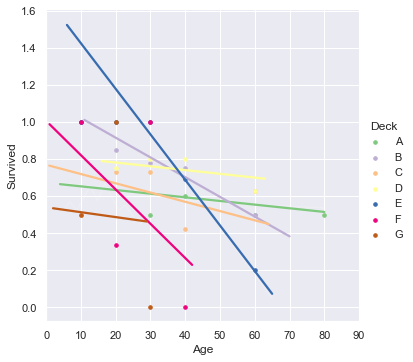

In [169]:
sns.lmplot(data=deck_df, x='Age', y='Survived', ci=0, x_bins=age_bins,
           hue='Deck', hue_order=order, markers='.', palette='Accent').set(xlim=(0,90))

Here I set the confidence interval parameter to 0 to make the graph easier to see.  Note the regression line for E deck extends to above 100% survival rate at younger ages.  This certainly does not make sense but its due to the fact that there is not a lot of data point for decked passengers on E deck.  These seven lines do not have clear separation from each is indicative that deck assignment is not as strongly correlated to the survival rate.

Lastly, let's take a look at whether having a family member onboard has any effect on survival rate.

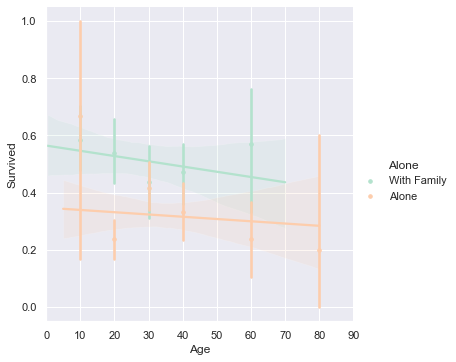

In [171]:
sns.lmplot(data=titanic_df, x='Age',y='Survived', x_bins=age_bins,
           hue='Alone', markers='.', palette='Pastel2').set(xlim=(0,90))

Interesting to see in the graph above is that passengers who have family members with them tend to have a better survival rate!

In conclusion, if you are an old male in the 3rd class with no family members with you on the *Titanic*, you are most likely to perish!